# Image Segmentation Using K-Means Clustering

## Import Libraries

In [1]:
import cv2
from kmeans import KMeansClustering
import matplotlib.pyplot as plt
import numpy as np

## Import Test Image

The dimensions of Test Image 2 are: (3465, 5202, 3)
(666, 1000, 3)


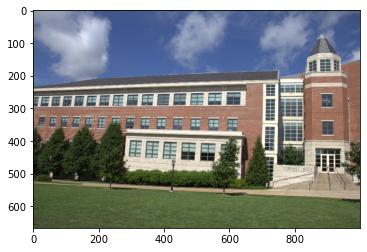

In [2]:
image = cv2.imread("images/cornell-hall-middle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("The dimensions of Test Image 2 are:", image.shape)


### Resize image for computational efficiency
h = image.shape[0]
w = image.shape[1]
d = image.shape[2]
h_w_ratio = h / w
new_w = 1000

new_dim = (new_w, new_w*h_w_ratio)
new_dim = np.int16(new_dim)
new_dim = tuple(new_dim)

image = cv2.resize(image, new_dim)
print(image.shape)

plt.imshow(image)

## Reshape Test Image

In [3]:
image_pixels = image.reshape((-1, 3))
image_pixels = np.float32(image_pixels)
print(image_pixels)
print(image_pixels.shape)

[[133. 138. 157.]
 [137. 147. 162.]
 [141. 148. 167.]
 ...
 [ 76.  86.  59.]
 [ 61.  85.  48.]
 [ 67.  68.  48.]]
(666000, 3)


## Predict Image Clusters

In [4]:
km_3 = KMeansClustering(K = 3, max_iterations = 100)
pred_3 = km_3.predict(image_pixels)

km_5 = KMeansClustering(K = 5, max_iterations = 100)
pred_5 = km_5.predict(image_pixels)

km_7 = KMeansClustering(K = 7, max_iterations = 100)
pred_7 = km_7.predict(image_pixels)

In [24]:
centers = np.uint8(km.cent())
centers

array([[ 70,  78,  54],
       [206, 204, 195],
       [115, 117, 137]], dtype=uint8)

In [31]:
pred = pred.astype(int)
print(type(pred))
np.unique(pred)

<class 'numpy.ndarray'>


array([0, 1, 2])

<class 'numpy.ndarray'>


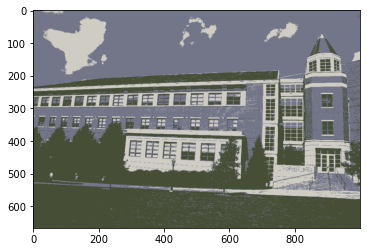

In [32]:
labels = pred.flatten()
print(type(labels))
out_image = centers[labels.flatten()]
out_image = out_image.reshape(image.shape)
plt.imshow(out_image)